In [1]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\KG\Documents\Git\DML\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
from pathlib import Path
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from itertools import chain
from PIL import Image
from torchvision import transforms
from torchvision.transforms import Compose, Grayscale
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import torch
from torch import nn
import torch.optim as optim
import numpy as np
import os
import shutil
import torch.nn as nn
from skimage.color import rgb2lab, lab2rgb

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
transform = Compose([ToTensor()])
images_path = "./Humans"
_workdir = Path("")


In [5]:
def is_grey_scale(img):
    if(not img.shape[0] == 3):
        return True

    r = img[0,:,:]
    g = img[1,:,:]
    b = img[2,:,:]

    if (torch.equal(r,g)):
        if (torch.equal(g,b)):
            return True
    '''d,w, h = img.size()
    for i in range(w):
        for j in range(h):
            if (img[0,i,j] == img[1,i,j] == img[2,i,j] ):
                return False'''
    return False

torch.Size([3, 600, 460])
True


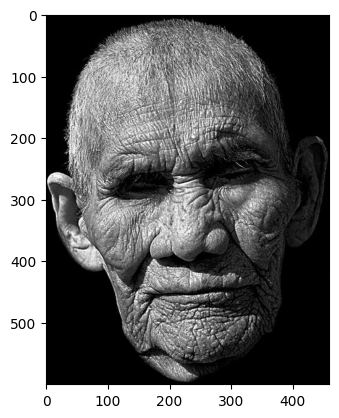

In [6]:
gray_img = transform(Image.open(images_path + "/1 (1000).jpg"))
plt.imshow(gray_img.permute(1, 2, 0), cmap='gray')
print(gray_img.shape)
print(is_grey_scale(gray_img))


False


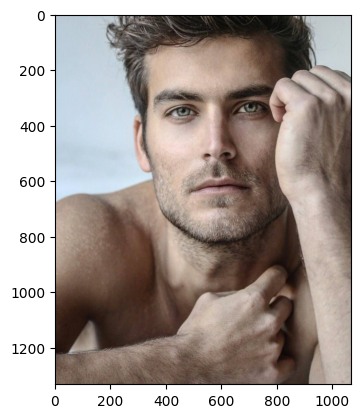

In [7]:

collor_img = transform(Image.open(images_path + "/1 (10).jpg"))
plt.imshow(collor_img.permute(1, 2, 0)  )
print(is_grey_scale(collor_img))


In [8]:


def collect_collored_samples(root, transform):
        paths = collect_imgs_sub_dir(root)
        collor_paths = []
        for i, path in enumerate(paths):
            if (not is_grey_scale(transform(Image.open(path)))):
                collor_paths.append(path)
            print(i)
        return collor_paths

def collect_imgs_sub_dir(sub_dir: Path):
    sub_dir = Path(sub_dir)
    if not Path(sub_dir).exists():
        raise ValueError(f"Data root '{self.root}' must contain sub dir '{sub_dir.name}'")

    return sub_dir.glob("*")

class Faces(Dataset):
    def __init__(self, root, transform, sampel_paths):
        
        root = Path(root)
        if not (root.exists() and root.is_dir()):
            raise ValueError(f"Data root '{root}' is invalid")
            
        self.root = root
        self.transform = transform

        
        self._samples = sampel_paths
            
    def __getitem__(self, index):

        path = self._samples[index]
        img = Image.open(path)
        
        if self.transform is not None:
            img = self.transform(img)
        return img
    
    def __len__(self):
        return(len(self._samples))

    def get_transform():
        return self.transform
   

    
    
    

In [9]:
len(list(collect_imgs_sub_dir(images_path)))

7219

Number of samples:  6501
Shape of first sampel:  torch.Size([3, 900, 600])


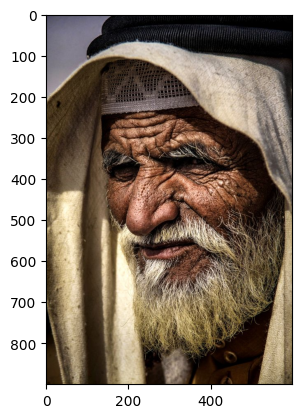

In [10]:
import csv


file_name = "collored_pics.csv"
if not os.path.exists(file_name):
    print("Extracting paths")
    paths = collect_collored_samples(images_path, transform)
    with open(file_name, mode='w', newline='') as f:
        writer = csv.writer(f)
        for path in paths:
            writer.writerow([path])

sampel_paths = []
with open(file_name, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        sampel_paths.append(row[0])
collored_imgs = Faces(root=images_path,transform=transform, sampel_paths=sampel_paths)


print("Number of samples: ", len(collored_imgs))
print("Shape of first sampel: ", collored_imgs[0].shape)
plt.imshow(collored_imgs[0].permute(1, 2, 0), cmap='gray')

<class 'torch.Tensor'>
Number of samples:  6501
Shape of first sampel:  torch.Size([1, 900, 600])


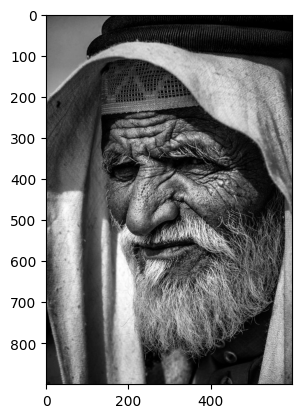

In [11]:
gray_scale = Compose([Grayscale(num_output_channels=1), ToTensor()])
gray_imgs = Faces(root=images_path,transform=gray_scale, sampel_paths=sampel_paths)

print(type(gray_imgs[0]))
print("Number of samples: ", len(gray_imgs))
print("Shape of first sampel: ", gray_imgs[0].shape)
plt.imshow(gray_imgs[0].permute(1, 2, 0), cmap='gray')

tensor(1.0000) tensor(0.9201)
tensor(0.0015) tensor(0.0110)


c:\Users\KG\Documents\Git\DML\.venv\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


tensor([[[0.7255, 0.7255, 0.7412,  ..., 0.7660, 0.7725, 0.7765],
         [0.7216, 0.7298, 0.7384,  ..., 0.7691, 0.7682, 0.7728],
         [0.7255, 0.7255, 0.7412,  ..., 0.7725, 0.7727, 0.7725],
         ...,
         [0.5127, 0.5020, 0.5011,  ..., 0.7730, 0.7137, 0.7320],
         [0.4500, 0.4435, 0.4855,  ..., 0.7476, 0.7525, 0.7373],
         [0.4916, 0.4615, 0.4747,  ..., 0.7670, 0.7569, 0.7154]],

        [[0.7922, 0.7921, 0.7882,  ..., 0.7973, 0.8039, 0.8078],
         [0.7878, 0.7960, 0.7854,  ..., 0.8004, 0.7996, 0.8042],
         [0.7882, 0.7882, 0.7882,  ..., 0.8039, 0.8040, 0.8039],
         ...,
         [0.4473, 0.4118, 0.4266,  ..., 0.7202, 0.6609, 0.6928],
         [0.3755, 0.3690, 0.4110,  ..., 0.7084, 0.7133, 0.6980],
         [0.4170, 0.3835, 0.4002,  ..., 0.7266, 0.7176, 0.6762]],

        [[0.8314, 0.8313, 0.8353,  ..., 0.8091, 0.8157, 0.8196],
         [0.8283, 0.8366, 0.8325,  ..., 0.8122, 0.8113, 0.8160],
         [0.8392, 0.8392, 0.8353,  ..., 0.8157, 0.8158, 0.

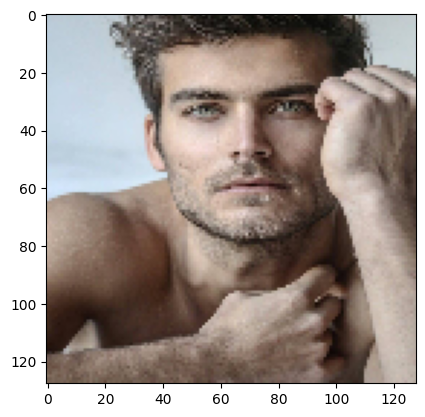

In [12]:
size = 128
output_size = (size, size)
resize = transforms.Resize(output_size)
normalize = ToTensor()
def to_LAB(t): 
    lab = torch.from_numpy(rgb2lab(t.numpy(), channel_axis=0)) 
    l = lab[0] / 100
    a = (lab[1] + 128) / 255
    b = (lab[2]+ 128) / 255
    return torch.clamp(torch.stack([l,a,b]), 0,1)
def add_a_b(t):
    return torch.stack([t, torch.full(t.shape, 0.5), torch.full(t.shape, 0.5)], dim = 0)
def to_RGB(t): 
    t = t.to("cpu")
    if(len(t.shape) == 2):
        t = add_a_b(t)
    lab = t
    l = lab[0] * 100
    a = lab[1] * 255 - 128
    b = lab[2] * 255 - 128
    t = torch.stack([l,a,b])
    t = torch.from_numpy(lab2rgb(t.numpy(), channel_axis=0))
    return torch.clamp(t, 0, 1)
    


pic = Image.open(images_path + "/1 (10).jpg")
pic = normalize(pic)
pic = resize(pic)
pic = to_LAB(pic)

plt.imshow(to_RGB(pic).permute(1, 2, 0), cmap='gray')
print(torch.max(to_RGB(pic)), torch.max(pic))
print(torch.min(to_RGB(pic)), torch.min(pic))
to_RGB(pic)


tensor([[[0.7760, 0.7759, 0.7765,  ..., 0.7860, 0.7926, 0.7965],
         [0.7718, 0.7800, 0.7737,  ..., 0.7891, 0.7883, 0.7929],
         [0.7737, 0.7737, 0.7765,  ..., 0.7926, 0.7927, 0.7926],
         ...,
         [0.4531, 0.4244, 0.4349,  ..., 0.7239, 0.6647, 0.6932],
         [0.3844, 0.3780, 0.4197,  ..., 0.7090, 0.7139, 0.6984],
         [0.4257, 0.3933, 0.4089,  ..., 0.7275, 0.7182, 0.6766]],

        [[0.7829, 0.7828, 0.7834,  ..., 0.7930, 0.7996, 0.8035],
         [0.7787, 0.7870, 0.7806,  ..., 0.7961, 0.7952, 0.7998],
         [0.7806, 0.7806, 0.7834,  ..., 0.7996, 0.7997, 0.7996],
         ...,
         [0.4594, 0.4307, 0.4412,  ..., 0.7307, 0.6714, 0.7000],
         [0.3905, 0.3840, 0.4259,  ..., 0.7158, 0.7207, 0.7052],
         [0.4319, 0.3994, 0.4151,  ..., 0.7343, 0.7251, 0.6834]],

        [[0.7852, 0.7851, 0.7857,  ..., 0.7953, 0.8019, 0.8058],
         [0.7810, 0.7892, 0.7829,  ..., 0.7984, 0.7975, 0.8021],
         [0.7829, 0.7829, 0.7857,  ..., 0.8019, 0.8020, 0.

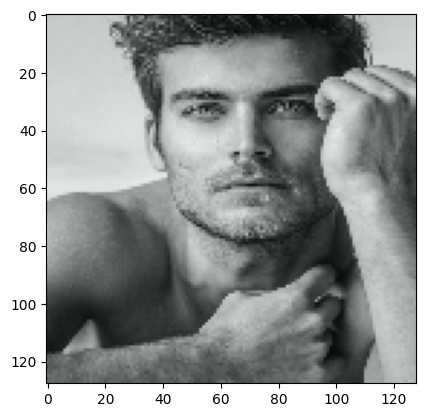

In [13]:
def lab_grayscale(t):
    L_channel = t[0]
    return  L_channel
pic = Image.open(images_path + "/1 (10).jpg")
pic = normalize(pic)
pic = resize(pic)
pic = to_LAB(pic)
pic = lab_grayscale(pic)
print(to_RGB(pic))
plt.imshow(to_RGB(pic).permute(1, 2, 0), cmap='gray')



torch.Size([3, 128, 128])

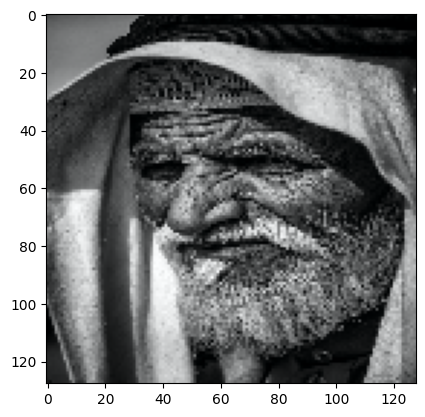

In [14]:


collor_final_tranform = Compose([ToTensor(), resize, to_LAB])
gray_final_tranform = Compose([ToTensor(), resize, to_LAB, lab_grayscale])

collored_imgs = Faces(root=images_path,transform=collor_final_tranform, sampel_paths=sampel_paths)
gray_imgs = Faces(root=images_path,transform=gray_final_tranform, sampel_paths=sampel_paths)

plt.imshow(to_RGB(gray_imgs[0]).permute(1, 2, 0), cmap='gray')
to_RGB(gray_imgs[0]).shape

tensor(1.9891) tensor(0.6213) tensor(0.6568)


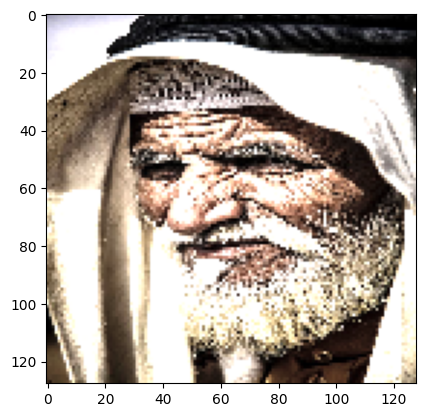

In [15]:
# lab_image_tensor is your input LAB image
L_channel = collored_imgs[0][0]
A_channel = collored_imgs[0][1]
B_channel = collored_imgs[0][2]
# Adjust the brightness factor
brightness_factor = 2  # You can adjust this factor as needed

# Scale the L channel
L_channel = L_channel * brightness_factor

# Ensure the L channel values are still within the [0, 100] range (valid for LAB)
bpic = torch.stack([L_channel, A_channel, B_channel], dim=0)

plt.imshow(to_RGB(bpic).permute(1, 2, 0), cmap='gray')
print(torch.max(L_channel), torch.max(A_channel),  torch.max(B_channel) )

In [16]:
class Faces_Double(Dataset):
    def __init__(self, collored, gray):
        assert(len(collored) == len(gray))
        self.gray = gray
        self.collored = collored
            
    def __getitem__(self, index):

        return self.collored[index], self.gray[index]
    
    def __len__(self):
        return(len( self.collored))

In [17]:
import random
random.seed(5555)
random.shuffle(sampel_paths)
split_test = 30
split_val = int(0.1 * len(sampel_paths))
split_train = len(sampel_paths) - split_test - split_val
assert(split_train + split_val + split_test == len(sampel_paths))

paths_train = sampel_paths[:split_train]
paths_val = sampel_paths[split_train: split_train + split_val]
paths_test = sampel_paths[split_train + split_val:]
assert(len(paths_train) + len(paths_val) + len(paths_test) == len(sampel_paths))

x = Faces(root=images_path,transform=collor_final_tranform,sampel_paths= paths_train)
y = Faces(root=images_path,transform=gray_final_tranform,sampel_paths=paths_train)
dataset_train = Faces_Double(y,x)

x = Faces(root=images_path,transform=gray_final_tranform,sampel_paths= paths_train)
y = Faces(root=images_path,transform=gray_final_tranform,sampel_paths=paths_train)
dataset_gray_train = Faces_Double(y,x)

x = Faces(root=images_path,transform=collor_final_tranform,sampel_paths=paths_val)
y = Faces(root=images_path,transform=gray_final_tranform,sampel_paths=paths_val)
dataset_val = Faces_Double(y,x)


x = Faces(root=images_path,transform=collor_final_tranform,sampel_paths=paths_test)
y = Faces(root=images_path,transform=gray_final_tranform,sampel_paths=paths_test)
dataset_test = Faces_Double(y,x)
assert(len(dataset_train) + len(dataset_val) + len(dataset_test) == len(sampel_paths))



x = Faces(root=images_path,transform=collor_final_tranform,sampel_paths=sampel_paths[:1])
y = Faces(root=images_path,transform=gray_final_tranform,sampel_paths=sampel_paths[:1])
mini_set = Faces_Double(y,x)


In [18]:
def output_to_label(z):
    
    # YOUR CODE HERE
    threshold = 0.5
    c = (z >= threshold).float().long()

    #print(z)
    #print(c)

    return c

In [19]:
def training_loop(model, optimizer, loss_fn, train_loader, val_loader, num_epochs, print_every):
    print("Starting training")
    device = torch.device("cuda" if torch.cuda.is_available() 
                                  else "cpu")
    model.to(device)
    train_losses, train_accs, val_losses, val_accs = [], [], [], []

    for epoch in range(1, num_epochs+1):
        model, train_loss, train_acc = train_epoch(model,
                                                   optimizer,
                                                   loss_fn,
                                                   train_loader,
                                                   val_loader,
                                                   device,
                                                   print_every)
        val_loss = validate(model, loss_fn, val_loader, device)
        print(f"Epoch {epoch}/{num_epochs}: "
              f"Train loss: {sum(train_loss)/len(train_loss):.10f}, "
              f"Val. loss: {val_loss:.10f}, ")
        train_losses.extend(train_loss)
        train_accs.extend(train_acc)
        val_losses.append(val_loss)
        val_accs.append(0)

    print()
    return model, train_losses, train_accs, val_losses, val_accs

def train_epoch(model, optimizer, loss_fn, train_loader, val_loader, device, print_every):
    # Train:
    model.train()
    train_loss_batches = []
    num_batches = len(train_loader)
    for batch_index, (x, y) in enumerate(train_loader, 1):
        inputs, labels = x.to(device), y.to(device)
        optimizer.zero_grad()
        z = model.forward(inputs)
        #print(float(torch.min(z)),float(torch.max(z)))
        #print(float(torch.min(labels)),float(torch.max(labels)))
        #print(z.shape, labels.shape)
        loss = loss_fn(z, labels.float())
        loss.backward()
        optimizer.step()
        train_loss_batches.append(loss.item())


        # If you want to print your progress more often than every epoch you can
        # set `print_every` to the number of batches you want between every status update.
        # Note that the print out will trigger a full validation on the full val. set => slows down training
        if print_every is not None and batch_index % print_every == 0:
            val_loss = validate(model, loss_fn, val_loader, device)
            model.train()
            print(f"\tBatch {batch_index}/{num_batches}: "
                  f"\tTrain loss: {sum(train_loss_batches[-print_every:])/print_every:.3f}, "
                  f"\tVal. loss: {val_loss:.3f}, "
)

    return model, train_loss_batches, []

def validate(model, loss_fn, val_loader, device):
    val_loss_cum = 0
    model.eval()
    with torch.no_grad():
        for batch_index, (x, y) in enumerate(val_loader, 1):
            inputs, labels = x.to(device), y.to(device)
            z = model.forward(inputs)

            batch_loss = loss_fn(z, labels.float())
            val_loss_cum += batch_loss.item()
    return val_loss_cum/len(val_loader)

In [20]:
def train_if_not_saved(workdir, model, name, optimizer, train_dataloader, val_dataloader, loss_func, epochs = 10):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    name = name + ".ckpt"
    if not os.path.exists(workdir / name):
        print(workdir / name)
        (
            model,
            train_losses,
            train_accs,
            val_losses,
            val_accs,
        ) = training_loop(
            model, optimizer, loss_func, train_dataloader, val_dataloader, epochs, None
        )
        torch.save({'model_state_dict': model.state_dict(),
                'train_losses': train_losses,
                'train_accs': train_accs,
                'val_losses': val_losses,
                'val_accs': val_accs,
                }, workdir / name )
        return model, train_losses,train_accs,val_losses, val_accs,
    (
        model_dict,
        train_losses,
        train_accs,
        val_losses,
        val_accs,
    ) = torch.load(workdir / name, map_location=torch.device("cpu")).values()

    return model, train_losses,train_accs,val_losses, val_accs,

u-net

In [21]:
class convolution_block(nn.Module):
    def __init__(self, in_c, out_c):
        super().__init__()
        self.conv1 = nn.Conv2d(in_c, out_c, kernel_size=3, padding='same')
        self.bn1 = nn.BatchNorm2d(out_c)
        self.conv2 = nn.Conv2d(out_c, out_c, kernel_size=3, padding='same')
        self.bn2 = nn.BatchNorm2d(out_c)
        self.relu = nn.ReLU()
    
    def forward(self, inputs):
        x = self.conv1(inputs)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        return x

class encoder_block(nn.Module):
    def __init__(self, in_c, out_c):
        super().__init__()
        self.conv = convolution_block(in_c, out_c)
        self.pool = nn.MaxPool2d((2, 2))
    def forward(self, inputs):
        x = self.conv(inputs)
        p = self.pool(x)
        return x, p

class decoder_block(nn.Module):
    def __init__(self, in_c, out_c):
        super().__init__()
        self.up = nn.ConvTranspose2d(in_c, out_c, kernel_size=2, stride=2, padding=0)
        self.conv = convolution_block(out_c+out_c, out_c)
    def forward(self, inputs, skip):
        x = self.up(inputs)
        x = torch.cat([x, skip], axis=1)
        x = self.conv(x)
        return x


In [22]:
class UNet(nn.Module):
    def __init__(self):
        super().__init__()
        """ Encoder """
        self.e1 = encoder_block(3, 64)
        self.e2 = encoder_block(64, 128)
        self.e3 = encoder_block(128, 256)
        self.e4 = encoder_block(256, 512)
        """ Bottleneck """
        self.bottle = convolution_block(512, 1024)
        """ Decoder """
        self.d1 = decoder_block(1024, 512)
        self.d2 = decoder_block(512, 512)
        self.d3 = decoder_block(512, 512)
        self.d4 = decoder_block(512, 3)

    def forward(self, inputs):
        """ Encoder """
        s1, p1 = self.e1(inputs)
        s2, p2 = self.e2(p1)
        s3, p3 = self.e3(p2)
        s4, p4 = self.e4(p3)
        """ Bottleneck """
        b = self.bottle(p4)
        """ Decoder """
        d1 = self.d1(b, s4)
        d2 = self.d2(d1, s3)
        d3 = self.d3(d2, s2)
        d4 = self.d4(d3, s1)

        outputs = nn.Sigmoid(d4)
        return outputs

DET ÄR DENNA U-NET SOM ÄR NICE

In [23]:
import torch
import torch.nn as nn
from torchvision import models
from torch.nn.functional import relu, sigmoid

class UNet2(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        
        # Encoder
        # In the encoder, convolutional layers with the Conv2d function are used to extract features from the input image. 
        # Each block in the encoder consists of two convolutional layers followed by a max-pooling layer, with the exception of the last block which does not include a max-pooling layer.
        # -------
        # input: 572x572x3
        self.e11 = nn.Conv2d(in_channels, 64, kernel_size=3, padding=1) # output: 570x570x64
        self.e12 = nn.Conv2d(64, 64, kernel_size=3, padding=1) # output: 568x568x64
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2) # output: 284x284x64

        # input: 284x284x64
        self.e21 = nn.Conv2d(64, 128, kernel_size=3, padding=1) # output: 282x282x128
        self.e22 = nn.Conv2d(128, 128, kernel_size=3, padding=1) # output: 280x280x128
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2) # output: 140x140x128

        # input: 140x140x128
        self.e31 = nn.Conv2d(128, 256, kernel_size=3, padding=1) # output: 138x138x256
        self.e32 = nn.Conv2d(256, 256, kernel_size=3, padding=1) # output: 136x136x256
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2) # output: 68x68x256

        # input: 68x68x256
        self.e41 = nn.Conv2d(256, 512, kernel_size=3, padding=1) # output: 66x66x512
        self.e42 = nn.Conv2d(512, 512, kernel_size=3, padding=1) # output: 64x64x512
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2) # output: 32x32x512

        # input: 32x32x512
        self.e51 = nn.Conv2d(512, 1024, kernel_size=3, padding=1) # output: 30x30x1024
        self.e52 = nn.Conv2d(1024, 1024, kernel_size=3, padding=1) # output: 28x28x1024


        # Decoder
        self.upconv1 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)
        self.d11 = nn.Conv2d(1024, 512, kernel_size=3, padding=1)
        self.d12 = nn.Conv2d(512, 512, kernel_size=3, padding=1)

        self.upconv2 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.d21 = nn.Conv2d(512, 256, kernel_size=3, padding=1)
        self.d22 = nn.Conv2d(256, 256, kernel_size=3, padding=1)

        self.upconv3 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.d31 = nn.Conv2d(256, 128, kernel_size=3, padding=1)
        self.d32 = nn.Conv2d(128, 128, kernel_size=3, padding=1)

        self.upconv4 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.d41 = nn.Conv2d(128, 64, kernel_size=3, padding=1)
        self.d42 = nn.Conv2d(64, 64, kernel_size=3, padding=1)

        # Output layer
        self.outconv = nn.Conv2d(64, out_channels, kernel_size=1)

    def forward(self, x):
        # Encoder
        x = torch.unsqueeze(x, dim=1)
        xe11 = relu(self.e11(x))
        xe12 = relu(self.e12(xe11))
        xp1 = self.pool1(xe12)

        xe21 = relu(self.e21(xp1))
        xe22 = relu(self.e22(xe21))
        xp2 = self.pool2(xe22)

        xe31 = relu(self.e31(xp2))
        xe32 = relu(self.e32(xe31))
        xp3 = self.pool3(xe32)

        xe41 = relu(self.e41(xp3))
        xe42 = relu(self.e42(xe41))
        xp4 = self.pool4(xe42)

        xe51 = relu(self.e51(xp4))
        xe52 = relu(self.e52(xe51))
        
        # Decoder
        xu1 = self.upconv1(xe52)
        xu11 = torch.cat([xu1, xe42], dim=1)
        xd11 = relu(self.d11(xu11))
        xd12 = relu(self.d12(xd11))

        xu2 = self.upconv2(xd12)
        xu22 = torch.cat([xu2, xe32], dim=1)
        xd21 = relu(self.d21(xu22))
        xd22 = relu(self.d22(xd21))

        xu3 = self.upconv3(xd22)
        xu33 = torch.cat([xu3, xe22], dim=1)
        xd31 = relu(self.d31(xu33))
        xd32 = relu(self.d32(xd31))

        xu4 = self.upconv4(xd32)
        xu44 = torch.cat([xu4, xe12], dim=1)
        xd41 = relu(self.d41(xu44))
        xd42 = relu(self.d42(xd41))

        # Output layerz
        out = self.outconv(xd42)
        return out

In [24]:
batch_size = 32
train_dataloader = DataLoader(dataset_train, batch_size=batch_size)
val_dataloader = DataLoader(dataset_val, batch_size=batch_size)

gray_train_dataset = DataLoader(dataset_gray_train, batch_size=32)
mini_dataloader =DataLoader(mini_set, batch_size = 1)

In [25]:
loss = nn.MSELoss()
loss(dataset_test[0][0], dataset_test[0][1])

c:\Users\KG\Documents\Git\DML\.venv\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([3, 128, 128])) that is different to the input size (torch.Size([128, 128])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(0.0399)

In [26]:
torch.max(mini_set[0][1])

tensor(0.8925)

In [27]:

def collorize(img, model):
    model.eval()
    with torch.no_grad():
        
        pic = torch.unsqueeze(img.to(device), dim=0)
        print(type(pic[0]))
        z = model.forward(pic)
    plt.imshow(to_RGB(z[0].to("cpu")).permute(1, 2, 0))
    z[0]

In [28]:
class ColorNet(nn.Module):
    def __init__(self):
        super(ColorNet, self).__init__()

        #Initial
        #self.initial =  nn.Sequential(nn.Conv2d(1, 3, kernel_size=3, stride=1, padding='same'))

        mod = models.vgg19(pretrained=True) 
        for parameters in mod.features.parameters():
            parameters.requires_grad = False

        # Extract midlevel features
        self.midlevel_vgg = mod.features

        # Second half: Upsampling
        self.upsample = nn.Sequential(  
          nn.Upsample(scale_factor=2),  
          nn.Conv2d(512, 128, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(128),
          nn.ReLU(),
          nn.Upsample(scale_factor=2),
          nn.Conv2d(128, 64, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(64),
          nn.ReLU(),
          nn.Upsample(scale_factor=2),
          nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(64),
          nn.ReLU(),
          nn.Upsample(scale_factor=2),
          nn.Conv2d(64, 32, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(32),
          nn.ReLU(),
          nn.Conv2d(32, 3, kernel_size=3, stride=1, padding=1),
          nn.Upsample(scale_factor=2)
        )

    def forward(self, input):
        
        mod_input = to_RGB(input)
        # Construct midlevel features for upsampling
        midlevel_features = self.midlevel_vgg(mod_input)
        print(midlevel_features.shape)
        # Upsample midlevel features to retrieve colors
        output = self.upsample(midlevel_features)
        print(output.shape)
        return to_LAB(output)

In [29]:
import torch
import torch.nn as nn
from torchvision import models
from torch.nn.functional import relu, sigmoid

class UNet3(nn.Module):
    def __init__(self, in_channels):
        super().__init__()
        
        # Encoder
        # In the encoder, convolutional layers with the Conv2d function are used to extract features from the input image. 
        # Each block in the encoder consists of two convolutional layers followed by a max-pooling layer, with the exception of the last block which does not include a max-pooling layer.
        # -------
        # input: 572x572x3
        self.e11 = nn.Conv2d(in_channels, 64, kernel_size=3, padding=1) # output: 570x570x64
        self.e12 = nn.Conv2d(64, 64, kernel_size=3, padding=1) # output: 568x568x64
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2) # output: 284x284x64

        # input: 284x284x64
        self.e21 = nn.Conv2d(64, 128, kernel_size=3, padding=1) # output: 282x282x128
        self.e22 = nn.Conv2d(128, 128, kernel_size=3, padding=1) # output: 280x280x128
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2) # output: 140x140x128

        # input: 140x140x128
        self.e31 = nn.Conv2d(128, 256, kernel_size=3, padding=1) # output: 138x138x256
        self.e32 = nn.Conv2d(256, 256, kernel_size=3, padding=1) # output: 136x136x256
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2) # output: 68x68x256

        # input: 68x68x256
        self.e41 = nn.Conv2d(256, 512, kernel_size=3, padding=1) # output: 66x66x512
        self.e42 = nn.Conv2d(512, 512, kernel_size=3, padding=1) # output: 64x64x512
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2) # output: 32x32x512

        # input: 32x32x512
        self.e51 = nn.Conv2d(512, 1024, kernel_size=3, padding=1) # output: 30x30x1024
        self.e52 = nn.Conv2d(1024, 1024, kernel_size=3, padding=1) # output: 28x28x1024


        # Decoder
        self.upconv1 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)
        self.d11 = nn.Conv2d(1024, 512, kernel_size=3, padding=1)
        self.d12 = nn.Conv2d(512, 512, kernel_size=3, padding=1)

        self.upconv2 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.d21 = nn.Conv2d(512, 256, kernel_size=3, padding=1)
        self.d22 = nn.Conv2d(256, 256, kernel_size=3, padding=1)

        self.upconv3 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.d31 = nn.Conv2d(256, 128, kernel_size=3, padding=1)
        self.d32 = nn.Conv2d(128, 128, kernel_size=3, padding=1)

        self.upconv4 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.d41 = nn.Conv2d(128, 64, kernel_size=3, padding=1)
        self.d42 = nn.Conv2d(64, 64, kernel_size=3, padding=1)

        # Output layer
        self.outconv = nn.Conv2d(64, 2, kernel_size=1)

    def forward(self, x):
        # Encoder
        L_channel = x.clone()
        x = torch.unsqueeze(x, dim=1)
        xe11 = relu(self.e11(x))
        xe12 = relu(self.e12(xe11))
        xp1 = self.pool1(xe12)

        xe21 = relu(self.e21(xp1))
        xe22 = relu(self.e22(xe21))
        xp2 = self.pool2(xe22)

        xe31 = relu(self.e31(xp2))
        xe32 = relu(self.e32(xe31))
        xp3 = self.pool3(xe32)

        xe41 = relu(self.e41(xp3))
        xe42 = relu(self.e42(xe41))
        xp4 = self.pool4(xe42)

        xe51 = relu(self.e51(xp4))
        xe52 = relu(self.e52(xe51))
        
        # Decoder
        xu1 = self.upconv1(xe52)
        xu11 = torch.cat([xu1, xe42], dim=1)
        xd11 = relu(self.d11(xu11))
        xd12 = relu(self.d12(xd11))

        xu2 = self.upconv2(xd12)
        xu22 = torch.cat([xu2, xe32], dim=1)
        xd21 = relu(self.d21(xu22))
        xd22 = relu(self.d22(xd21))

        xu3 = self.upconv3(xd22)
        xu33 = torch.cat([xu3, xe22], dim=1)
        xd31 = relu(self.d31(xu33))
        xd32 = relu(self.d32(xd31))

        xu4 = self.upconv4(xd32)
        xu44 = torch.cat([xu4, xe12], dim=1)
        xd41 = relu(self.d41(xu44))
        xd42 = relu(self.d42(xd41))

        # Output layer
        out = self.outconv(xd42)
        return torch.cat([L_channel.unsqueeze(1), out], dim=1)

In [30]:
if not os.path.exists("good_model3.ckpt"):
    model = UNet3(1)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
    loss_func = nn.L1Loss()
    #results = train_if_not_saved(_workdir, model, "first_model", optimizer, mini_dataloader, mini_dataloader, loss_func, epochs=10)
   
    (
        model,
        train_losses,
        train_accs,
        val_losses,
        val_accs,
    ) = training_loop(
                model, optimizer, loss_func, train_dataloader, val_dataloader, 20, None
    )
    torch.save({'model_state_dict': model.state_dict(),
                'train_losses': train_losses,
                'train_accs': train_accs,
                'val_losses': val_losses,
                'val_accs': val_accs,
                }, Path("good_model3.ckpt") )

In [76]:
(
        model_dict_unet,
        train_losses,
        train_accs,
        val_losses,
        val_accs,
    ) = torch.load(Path("good_model3.ckpt"), map_location=torch.device("cpu")).values()

<class 'torch.Tensor'>


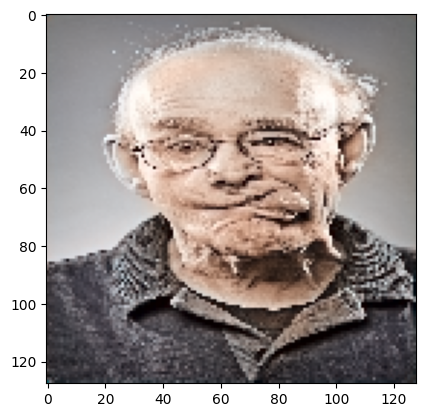

In [32]:

model = UNet3(1)
model.to(device).load_state_dict(model_dict_unet)
collorize(dataset_test[0][0], model)

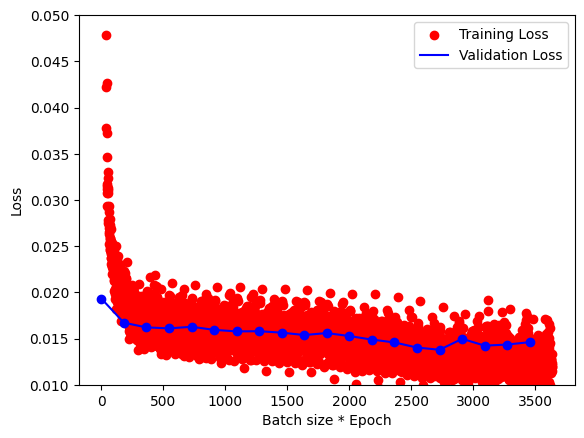

0.014608565762284257


In [211]:
plt.scatter(range(len(train_losses)), train_losses, c="red", label="Training Loss")
plt.plot(range(0, len(val_losses) * len(train_dataloader), len(train_dataloader)), val_losses, c="blue", label="Validation Loss")
plt.scatter(range(0, len(val_losses) * len(train_dataloader),  len(train_dataloader)), val_losses, c="blue")

plt.ylim(0.01, 0.05)
plt.legend()
plt.ylabel("Loss")
plt.xlabel("Batch size * Epoch")
plt.savefig('unet_loss.png')
plt.show()
print((val_losses)[-1])

In [34]:
bucket_length = 200

def count_bucket(loader):
    count = torch.zeros((bucket_length, bucket_length))
    for i, pic_two in enumerate(loader):
        
        print(i)
        pic = pic_two[1]
        a_channel = pic[1]
        b_channel = pic[2]

        for a, b in zip(a_channel.reshape(-1), b_channel.reshape(-1)):
            x = round(float(a) * bucket_length)
            y = round(float(b) * bucket_length)
            
            count[y][x] = count[y][x] + 1
        
    
    
    return count






(0.0, 199.0)

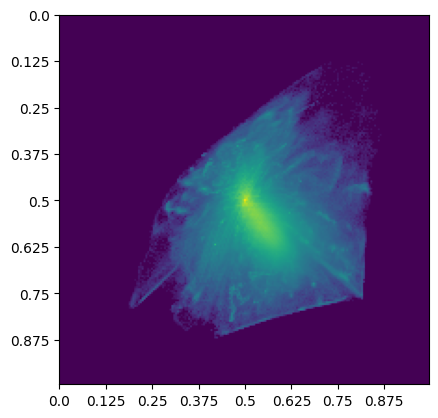

In [35]:
if not os.path.exists("count.pt"):
    count = count_bucket(dataset_train)
    torch.save(count, 'count.pt')
count = torch.load('count.pt')
adj_count = count + torch.full(count.shape, 1)

def scale_y_tick_labels(value, pos):
    return value / 200.0

# Create a custom y-axis formatter using FuncFormatter
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(scale_y_tick_labels)

# Apply the custom formatter to the y-axis
plt.gca().yaxis.set_major_formatter(formatter)
# Apply the custom formatter to the y-axis
plt.gca().xaxis.set_major_formatter(formatter)


plt.imshow(torch.log(((adj_count))))
plt.savefig('counts')
plt.ylim(199, 0)
plt.xlim(0, 199)


In [36]:
print(torch.max(count), torch.sum(count), torch.mean(count), count[count == 0].shape, count.shape)

tensor(7090642.) tensor(95371264.) tensor(2384.2815) torch.Size([28242]) torch.Size([200, 200])


tensor(1.4103e-07) tensor(1.) tensor(29324.3633) tensor(0.7331)


'print(torch.min(count))\npixel_w = 1 / (count + torch.full((bucket_length, bucket_length), 1)) \npixel_w = pixel_w / pixel_w.sum()\nprint(torch.min(pixel_w),torch.max(pixel_w), pixel_w.sum())\nplt.imshow((pixel_w))'

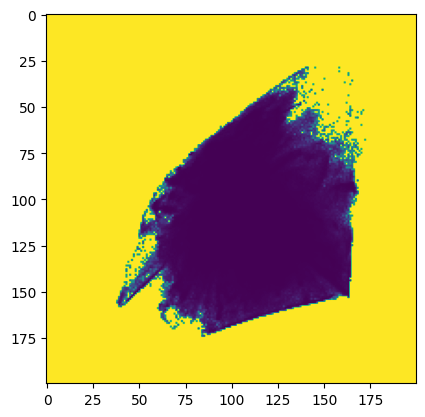

In [37]:
import math
def get_w(c):
    pixel_w = c.clone()
    pixel_w[pixel_w == 0] = torch.min( pixel_w[pixel_w != 0])
    pixel_w = 1 / pixel_w
    return pixel_w
pixel_w = get_w(count)
print(torch.min(pixel_w),torch.max(pixel_w), pixel_w.sum(), pixel_w.mean())

plt.imshow((pixel_w))

"""import math
print(type(count + 1))
def get_w(c):
    #pixel_w = torch.log(torch.log(torch.log(c + 1) + 1) + 1)                                                #double log to bring values together
    pixel_w = c
    pixel_w[pixel_w == 0] = 1
    pixel_w = pixel_w * -1                                                                   #invert to punish larg values
    pixel_w = (pixel_w - torch.min(pixel_w)) / (torch.max(pixel_w) - torch.min(pixel_w))     #normalize, all 0 will become 1
    pixel_w[pixel_w == 1] =  torch.max(pixel_w[pixel_w != 1])                                #move all 1s to the cloasest non 1 number
    pixel_w = (pixel_w - torch.min(pixel_w)) / (torch.max(pixel_w) - torch.min(pixel_w))     #normalize
    pixel_w = pixel_w 
    return pixel_w
pixel_w = get_w(count)
print(torch.min(pixel_w),torch.max(pixel_w), pixel_w.sum(), pixel_w.mean())
plt.imshow((pixel_w))"""
"""print(torch.min(count))
pixel_w = 1 / (count + torch.full((bucket_length, bucket_length), 1)) 
pixel_w = pixel_w / pixel_w.sum()
print(torch.min(pixel_w),torch.max(pixel_w), pixel_w.sum())
plt.imshow((pixel_w))"""

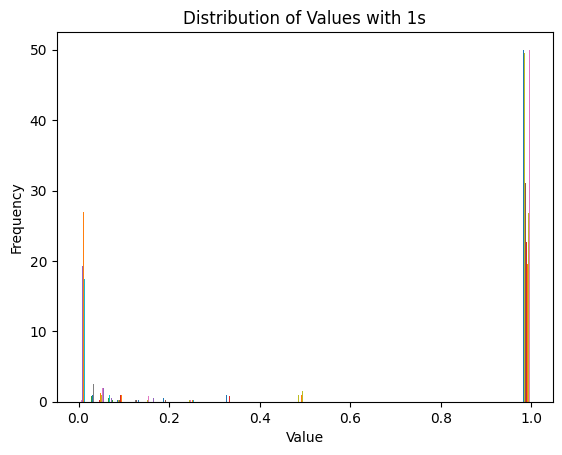

In [38]:
plt.hist(pixel_w.numpy(), bins=50, density=True, alpha=1)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Distribution of Values with 1s")
plt.show()





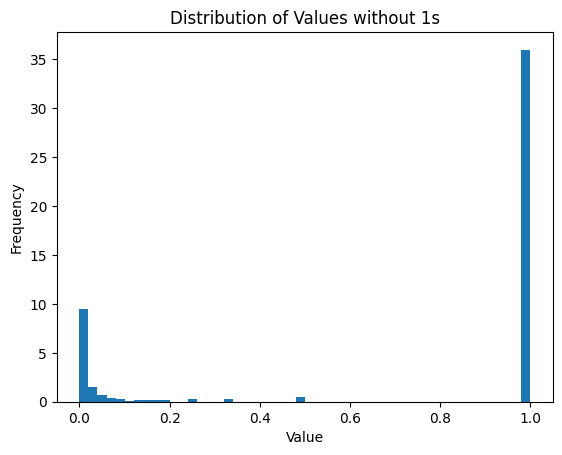

In [39]:

plt.hist(pixel_w[pixel_w != 2].numpy(), bins=50, density=True, alpha=1)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Distribution of Values without 1s")
plt.show()

In [40]:
"""import torch

# Create a sample tensor
tensor = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 9, 11]])

# Create a custom boolean mask
boolean_mask = torch.zeros_like(tensor, dtype=torch.bool)
boolean_mask[0] = (tensor[0] % 2 == 0)  # Select even numbers from the first row
boolean_mask[1] = (tensor[1] % 2 != 0)  # Select odd numbers from the second and third rows

# Use the boolean mask to select elements from the tensor
selected_elements = tensor[boolean_mask]

# Print the selected elements and the boolean mask
print("Original Tensor:")
print(tensor)
print("\nBoolean Mask:")
print(boolean_mask)
print("\nSelected Elements:")
print(selected_elements)
"""

'import torch\n\n# Create a sample tensor\ntensor = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 9, 11]])\n\n# Create a custom boolean mask\nboolean_mask = torch.zeros_like(tensor, dtype=torch.bool)\nboolean_mask[0] = (tensor[0] % 2 == 0)  # Select even numbers from the first row\nboolean_mask[1] = (tensor[1] % 2 != 0)  # Select odd numbers from the second and third rows\n\n# Use the boolean mask to select elements from the tensor\nselected_elements = tensor[boolean_mask]\n\n# Print the selected elements and the boolean mask\nprint("Original Tensor:")\nprint(tensor)\nprint("\nBoolean Mask:")\nprint(boolean_mask)\nprint("\nSelected Elements:")\nprint(selected_elements)\n'

In [41]:
class L1_ab_weighted_loss():
    def __init__(self,w):
        self.w = w
    def  __call__(self, input, target):
        return self.forward(input, target)

    def forward(self, inputs, targets):
        for input, target in zip(inputs, targets):
            input_a = input[1]
            input_b = input[2]

            target_a = target[1]
            target_b = target[2]
            loss = 0
            for ia, ib, ta, tb in zip(input_a.reshape(-1), input_b.reshape(-1), target_a.reshape(-1), target_b.reshape(-1)):
                target_x = round(float(ta) * self.w.shape[1])
                target_y = round(float(tb) * self.w.shape[0])

                pixel_loss = torch.abs(ia-ta) + torch.abs(ib-tb)
                weighted_pixel_loss = pixel_loss * self.w[target_y][target_x]
                loss = loss + weighted_pixel_loss
        print("lossss")
        return loss

In [42]:
import concurrent.futures
class L1_ab_weighted_loss_multithread():
    def __init__(self,w):
        self.w = w
    def  __call__(self, input, target):
        return self.forward(input, target)

    def forward(self, inputs, targets):
        with concurrent.futures.ThreadPoolExecutor(max_workers=6) as executor:
            tasks = []
            for i, (input, target) in enumerate(zip(inputs, targets)):
                tasks.append(executor.submit(self.loss_pic, input, target, i))
            loss = 0
            for task in tasks:
                loss = loss + task.result()
        print("losss")
        return loss
        

    def loss_pic(self, input, target, id):
  
        input_a = input[1]
        input_b = input[2]

        target_a = target[1]
        target_b = target[2]
        loss = 0
        for ia, ib, ta, tb in zip(input_a.reshape(-1), input_b.reshape(-1), target_a.reshape(-1), target_b.reshape(-1)):
            target_x = round(float(ta) * self.w.shape[1])
            target_y = round(float(tb) * self.w.shape[0])

            pixel_loss = torch.abs(ia-ta) + torch.abs(ib-tb)
            weighted_pixel_loss = pixel_loss * self.w[target_y][target_x]
            loss = loss + weighted_pixel_loss
     
        return loss

In [43]:
def weigh_batch(batch, w):
    bucket_len = w.shape[0]
    batch_weights = torch.zeros(batch.shape).to(device)
    for y in range(bucket_len):
        for x in range(bucket_len):
            mask = torch.zeros_like(batch, dtype=torch.bool).to(device)
            mask_a = (x / bucket_len < batch[:, 1]) & ((x+1) / bucket_len > batch[:, 1] )
            mask_b = (y / bucket_len < batch[:, 2]) & ((y+1) / bucket_len > batch[:, 2] )
            mask[:, 1] = mask_a & mask_b
            mask[:, 2] = mask_a & mask_b
            batch_weights[mask] =  w[y][x]

    return batch_weights

w = torch.Tensor([[-1,1],[1,-1]])
pic = [[[[0,0,0,0],                [0,0,0,0],                [0,0,0,0],                [0,0,0,0]],                  #row1, row2, row3, row4
        [[0.25, 0.25, 0.25, 0.25], [0.75, 0.75, 0.75, 0.75], [0.25, 0.25, 0.25, 0.25], [0.75, 0.75, 0.75, 0.75]],
        [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.75, 0.75, 0.75, 0.75] ,[0.75, 0.75, 0.75, 0.75]]],

        [[[0,0,0,0],                [0,0,0,0],                [0,0,0,0],                [0,0,0,0]],                  #row1, row2, row3, row4
        [ [0.75, 0.75, 0.75, 0.75], [0.25, 0.25, 0.25, 0.25], [0.75, 0.75, 0.75, 0.75], [0.25, 0.25, 0.25, 0.25]],
        [ [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.75, 0.75, 0.75, 0.75], [0.75, 0.75, 0.75, 0.75]]]
        ]
batch =  torch.Tensor(pic)
print(w)
print(batch.shape)
weigh_batch(batch, w)

tensor([[-1.,  1.],
        [ 1., -1.]])
torch.Size([2, 3, 4, 4])


tensor([[[[ 0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.]],

         [[-1., -1., -1., -1.],
          [ 1.,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  1.],
          [-1., -1., -1., -1.]],

         [[-1., -1., -1., -1.],
          [ 1.,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  1.],
          [-1., -1., -1., -1.]]],


        [[[ 0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.]],

         [[ 1.,  1.,  1.,  1.],
          [-1., -1., -1., -1.],
          [-1., -1., -1., -1.],
          [ 1.,  1.,  1.,  1.]],

         [[ 1.,  1.,  1.,  1.],
          [-1., -1., -1., -1.],
          [-1., -1., -1., -1.],
          [ 1.,  1.,  1.,  1.]]]], device='cuda:0')

In [44]:
def weigh_batch_fast(batch, w):
    batch_weights = torch.zeros(batch.shape).to(device)
    xs = torch.round(batch[:, 1] * (w.shape[1] - 1)).long() #x
    ys = torch.round(batch[:, 2] * (w.shape[0] - 1)).long() #y
    weights = w[ys, xs]
    batch_weights[:, 1] = weights
    batch_weights[:, 2] = weights
    return batch_weights


assert(torch.equal( weigh_batch_fast(batch, w), weigh_batch(batch, w)))

In [45]:
class New_L1_ab_weighted_loss():
    def __init__(self,w, weight_calculator = weigh_batch_fast, ratio = 1):
        self.w = w
        self.weight_calculator = weight_calculator
        self.ratio = ratio
    def  __call__(self, input, target):
        return self.forward(input, target)

    def forward(self, inputs, targets):
        
        batch_weights = self.weight_calculator(targets, self.w)
        dif = torch.abs(inputs - targets)
        weigh_dif = dif * batch_weights * self.ratio + dif * (1- self.ratio)
        return weigh_dif.mean()


batch = next(iter(train_dataloader))
fake_w = torch.rand(100, 100, dtype=torch.float32, device=device)
loss = New_L1_ab_weighted_loss(pixel_w.to(device))
with torch.no_grad():
    print(batch[0].shape)
    preds = model.forward(batch[0].to(device))
print(preds.shape)
loss(preds, batch[1].to(device))

torch.Size([32, 128, 128])
torch.Size([32, 3, 128, 128])


tensor(7.3481e-06, device='cuda:0')

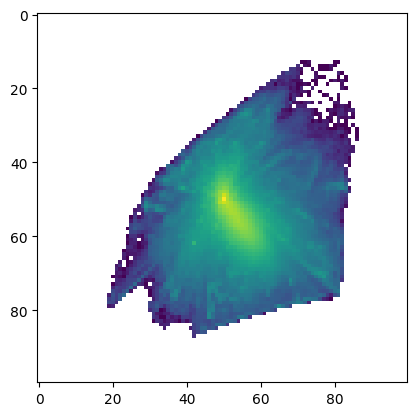

In [46]:
smaller_count = torch.zeros(100,100)
for y in range(0,count.shape[0],2):
    for x in range(0, count.shape[0],2):
        smaller_count[y//2][x//2] = count[y][x] + count[y+1][x] + count[y][x+1] + count[y+1][x+1]

plt.imshow(torch.log(smaller_count))

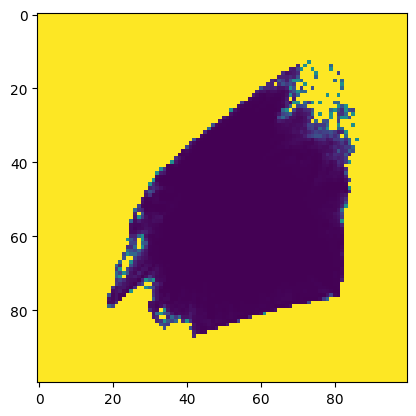

In [47]:
smller_pixel_w = get_w(smaller_count)
plt.imshow(smller_pixel_w)

In [61]:
class ColorNet2(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()

        #Initial
        #self.initial =  nn.Sequential(nn.Conv2d(1, 3, kernel_size=3, stride=1, padding='same'))

        mod = models.vgg19(pretrained=True) 
        for parameters in mod.features.parameters():
            parameters.requires_grad = False

        # Extract midlevel features
        self.midlevel_vgg = mod.features

        # Encoder
        # In the encoder, convolutional layers with the Conv2d function are used to extract features from the input image. 
        # Each block in the encoder consists of two convolutional layers followed by a max-pooling layer, with the exception of the last block which does not include a max-pooling layer.
        # -------
        # input: 572x572x3
        self.e11 = nn.Conv2d(in_channels, 64, kernel_size=3, padding=1) # output: 570x570x64
        self.e12 = nn.Conv2d(64, 64, kernel_size=3, padding=1) # output: 568x568x64
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2) # output: 284x284x64

        # input: 284x284x64
        self.e21 = nn.Conv2d(64, 128, kernel_size=3, padding=1) # output: 282x282x128
        self.e22 = nn.Conv2d(128, 128, kernel_size=3, padding=1) # output: 280x280x128
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2) # output: 140x140x128

        # input: 140x140x128
        self.e31 = nn.Conv2d(128, 256, kernel_size=3, padding=1) # output: 138x138x256
        self.e32 = nn.Conv2d(256, 256, kernel_size=3, padding=1) # output: 136x136x256
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2) # output: 68x68x256

        # input: 68x68x256
        self.e41 = nn.Conv2d(256, 512, kernel_size=3, padding=1) # output: 66x66x512
        self.e42 = nn.Conv2d(512, 512, kernel_size=3, padding=1) # output: 64x64x512
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2) # output: 32x32x512

        # input: 32x32x512
        self.e51 = nn.Conv2d(512, 1024, kernel_size=3, padding=1) # output: 30x30x1024
        self.e52 = nn.Conv2d(1024, 1024, kernel_size=3, padding=1) # output: 28x28x1024

        self.vgg_upconv = nn.ConvTranspose2d(512, 512, kernel_size=2, stride=2, padding=0) 


        # Decoder
        self.upconv1 = nn.ConvTranspose2d(1536, 512, kernel_size=2, stride=2)
        self.d11 = nn.Conv2d(1024, 512, kernel_size=3, padding=1)
        self.d12 = nn.Conv2d(512, 512, kernel_size=3, padding=1)

        self.upconv2 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.d21 = nn.Conv2d(512, 256, kernel_size=3, padding=1)
        self.d22 = nn.Conv2d(256, 256, kernel_size=3, padding=1)

        self.upconv3 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.d31 = nn.Conv2d(256, 128, kernel_size=3, padding=1)
        self.d32 = nn.Conv2d(128, 128, kernel_size=3, padding=1)

        self.upconv4 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.d41 = nn.Conv2d(128, 64, kernel_size=3, padding=1)
        self.d42 = nn.Conv2d(64, 64, kernel_size=3, padding=1)

        # Output layer
        self.outconv = nn.Conv2d(64, 2, kernel_size=1)

    def forward(self, x):
        L_channel = x.clone()
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        #print("in", x.shape)
        func = lambda t : to_RGB(t.to(device)).to(device)
        pics = []
        for  pic in (x):
            pics.append(func(pic))
        vgg_x = torch.stack(pics, dim=0)
        # Construct midlevel features for upsampling
        #print("before vgg", vgg_x.shape)
        midlevel_features = self.midlevel_vgg(vgg_x)
        #print("mid", midlevel_features.shape)
        vgg_features = self.vgg_upconv(midlevel_features)
        #print("out", vgg_features.shape)

        x = torch.unsqueeze(x, dim=1)
        xe11 = relu(self.e11(x))
        xe12 = relu(self.e12(xe11))
        xp1 = self.pool1(xe12)

        xe21 = relu(self.e21(xp1))
        xe22 = relu(self.e22(xe21))
        xp2 = self.pool2(xe22)

        xe31 = relu(self.e31(xp2))
        xe32 = relu(self.e32(xe31))
        xp3 = self.pool3(xe32)

        xe41 = relu(self.e41(xp3))
        xe42 = relu(self.e42(xe41))
        xp4 = self.pool4(xe42)

        xe51 = relu(self.e51(xp4))
        xe52 = relu(self.e52(xe51))
        
        # Decoder
        #print(xe52.shape,vgg_features.shape)
        encode_n_vgg = torch.cat([xe52, vgg_features], dim=1)
        xu1 = self.upconv1(encode_n_vgg)
        xu11 = torch.cat([xu1, xe42], dim=1)
        xd11 = relu(self.d11(xu11))
        xd12 = relu(self.d12(xd11))

        xu2 = self.upconv2(xd12)
        xu22 = torch.cat([xu2, xe32], dim=1)
        xd21 = relu(self.d21(xu22))
        xd22 = relu(self.d22(xd21))

        xu3 = self.upconv3(xd22)
        xu33 = torch.cat([xu3, xe22], dim=1)
        xd31 = relu(self.d31(xu33))
        xd32 = relu(self.d32(xd31))

        xu4 = self.upconv4(xd32)
        xu44 = torch.cat([xu4, xe12], dim=1)
        xd41 = relu(self.d41(xu44))
        xd42 = relu(self.d42(xd41))

        # Output layer
        out = self.outconv(xd42)

        return torch.cat([L_channel.unsqueeze(1), out], dim=1)



In [49]:
batch_size = 24
vgg_train_dataloader = DataLoader(dataset_train, batch_size=batch_size)
vgg_val_dataloader = DataLoader(dataset_val, batch_size=batch_size)

In [63]:
if not os.path.exists("vgg_model3.ckpt"):
    model = ColorNet2(1,3).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
    loss_func = nn.L1Loss()
    #results = train_if_not_saved(_workdir, model, "first_model", optimizer, mini_dataloader, mini_dataloader, loss_func, epochs=10)

    (
        model,
        train_losses,
        train_accs,
        val_losses,
        val_accs,
    ) = training_loop(
                model, optimizer, loss_func, vgg_train_dataloader, vgg_val_dataloader, 20, None
    )
    torch.save({'model_state_dict': model.state_dict(),
                'train_losses': train_losses,
                'train_accs': train_accs,
                'val_losses': val_losses,
                'val_accs': val_accs,
                }, Path("vgg_model3.ckpt"))

Starting training
Epoch 1/20: Train loss: 0.0509860583, Val. loss: 0.0197721217, 
Epoch 2/20: Train loss: 0.0172890200, Val. loss: 0.0175338253, 
Epoch 3/20: Train loss: 0.0158719998, Val. loss: 0.0165690550, 
Epoch 4/20: Train loss: 0.0153824958, Val. loss: 0.0161982102, 
Epoch 5/20: Train loss: 0.0150637694, Val. loss: 0.0161491159, 
Epoch 6/20: Train loss: 0.0147280292, Val. loss: 0.0156798932, 
Epoch 7/20: Train loss: 0.0144051884, Val. loss: 0.0151375751, 
Epoch 8/20: Train loss: 0.0140162908, Val. loss: 0.0146611504, 
Epoch 9/20: Train loss: 0.0136079547, Val. loss: 0.0143576077, 
Epoch 10/20: Train loss: 0.0131774369, Val. loss: 0.0142131295, 
Epoch 11/20: Train loss: 0.0127479204, Val. loss: 0.0140684653, 
Epoch 12/20: Train loss: 0.0125406545, Val. loss: 0.0145452417, 
Epoch 13/20: Train loss: 0.0125445100, Val. loss: 0.0165107813, 
Epoch 14/20: Train loss: 0.0122057454, Val. loss: 0.0132087783, 
Epoch 15/20: Train loss: 0.0113558444, Val. loss: 0.0130564090, 
Epoch 16/20: Tra

In [67]:
"""(
        _,
        vgg_train_losses,
        vgg_train_accs,
        vgg_val_losses,
        vgg_val_accs,
    ) = torch.load(Path("vgg_model.ckpt"), map_location=torch.device("cpu")).values()
(
        vgg_model_dict,
        vgg_train_losses2,
        vgg_train_accs2,
        vgg_val_losses2,
        vgg_val_accs2,
    ) = torch.load(Path("vgg_model2.ckpt"), map_location=torch.device("cpu")).values()
vgg_train_losses.extend(vgg_train_losses2)
vgg_val_losses.extend(vgg_val_losses2)"""
(
        vgg_model_dict,
        vgg_train_losses,
        vgg_train_accs,
        vgg_val_losses,
        vgg_val_accs2,
    ) = torch.load(Path("vgg_model3.ckpt"), map_location=torch.device("cpu")).values()


<class 'torch.Tensor'>


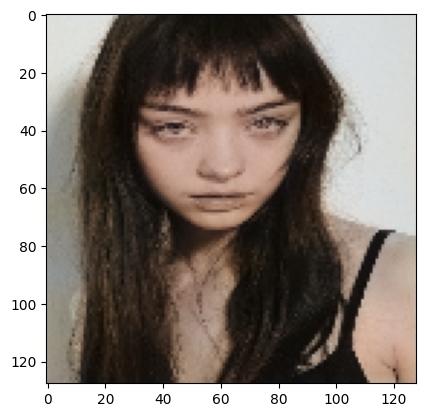

In [73]:
model = ColorNet2(1,3).to(device)
model.to(device).load_state_dict(vgg_model_dict)
collorize(dataset_test[4][0], model)

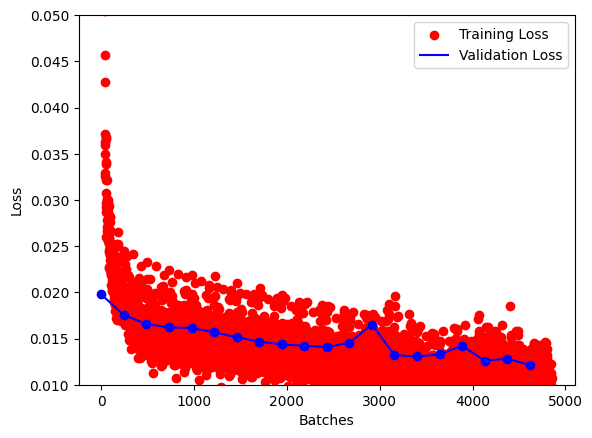

0.012143243802711368


In [212]:

plt.scatter(range(len(vgg_train_losses)), vgg_train_losses, c="red", label="Training Loss")
plt.plot(range(0, len(vgg_val_losses) * len(vgg_train_dataloader), len(vgg_train_dataloader)), vgg_val_losses, c="blue", label="Validation Loss")
plt.scatter(range(0, len(vgg_val_losses) * len(vgg_train_dataloader),  len(vgg_train_dataloader)), vgg_val_losses, c="blue")

plt.ylim(0.01, 0.05)
plt.legend()
plt.ylabel("Loss")
plt.xlabel("Batches")
plt.savefig('vgg_loss.png')
plt.show()
print(vgg_val_losses[-1])


In [54]:
if not os.path.exists("weighted_fast.ckpt"):
    model = ColorNet2(1,3).to(device)
    #model.to(device).load_state_dict(vgg_model_dict)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, weight_decay=0.01)
    loss_func = New_L1_ab_weighted_loss(pixel_w.to(device), ratio=0.2)
    #results = train_if_not_saved(_workdir, model, "first_model", optimizer, mini_dataloader, mini_dataloader, loss_func, epochs=10)

    (
        model,
        train_losses,
        train_accs,
        val_losses,
        val_accs,
    ) = training_loop(
                model, optimizer, loss_func, train_dataloader, val_dataloader, 20, None
    )
    torch.save({'model_state_dict': model.state_dict(),
                'train_losses': train_losses,
                'train_accs': train_accs,
                'val_losses': val_losses,
                'val_accs': val_accs,
                }, Path("weighted_fast.ckpt"))

c:\Users\KG\Documents\Git\DML\.venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\KG\Documents\Git\DML\.venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Starting training


c:\Users\KG\Documents\Git\DML\.venv\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Epoch 1/20: Train loss: 0.1050704539, Val. loss: 0.0307841651, 
Epoch 2/20: Train loss: 0.0299049944, Val. loss: 0.0289828219, 
Epoch 3/20: Train loss: 0.0284899156, Val. loss: 0.0277667383, 
Epoch 4/20: Train loss: 0.0275307692, Val. loss: 0.0270631587, 
Epoch 5/20: Train loss: 0.0270083998, Val. loss: 0.0267254287, 
Epoch 6/20: Train loss: 0.0266240082, Val. loss: 0.0263699831, 
Epoch 7/20: Train loss: 0.0263818673, Val. loss: 0.0261242179, 
Epoch 8/20: Train loss: 0.0261481105, Val. loss: 0.0259631579, 
Epoch 9/20: Train loss: 0.0260947326, Val. loss: 0.0258276722, 
Epoch 10/20: Train loss: 0.0258874340, Val. loss: 0.0256992904, 
Epoch 11/20: Train loss: 0.0258244677, Val. loss: 0.0256558106, 
Epoch 12/20: Train loss: 0.0257470871, Val. loss: 0.0255417146, 
Epoch 13/20: Train loss: 0.0257034471, Val. loss: 0.0255938446, 
Epoch 14/20: Train loss: 0.0255933700, Val. loss: 0.0255353390, 
Epoch 15/20: Train loss: 0.0255494521, Val. loss: 0.0253947708, 
Epoch 16/20: Train loss: 0.0255748

In [57]:

(
        vgg_model_dict_extended,
        vgg_train_losses2,
        vgg_train_accs2,
        vgg_val_losses2,
        vgg_val_accs2,
    ) = torch.load(Path("weighted_fast.ckpt"), map_location=torch.device("cpu")).values()


<class 'torch.Tensor'>


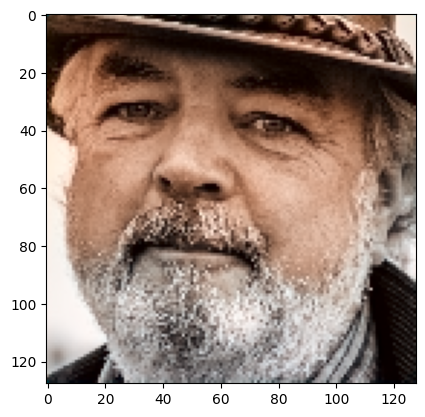

In [204]:
nr = 27
model = UNet3(1).to(device)
model.to(device).load_state_dict(model_dict_unet)
collorize(dataset_test[nr][0], model)

<class 'torch.Tensor'>


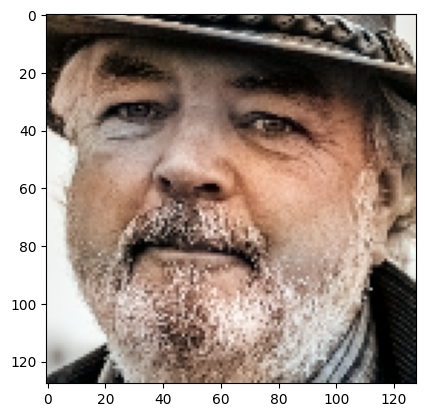

In [205]:
model = ColorNet2(1,3).to(device)
model.to(device).load_state_dict(vgg_model_dict)
collorize(dataset_test[nr][0], model)

torch.Size([3, 128, 128])

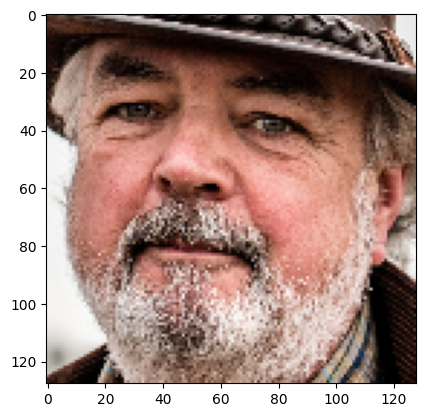

In [206]:
plt.imshow(to_RGB(dataset_test[nr][1].to("cpu")).permute(1, 2, 0))
mini_set[0][1].shape

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9284ba7d-4bf4-4872-af79-6dede9cef3e6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>